Extracted output to /home/codespace/earth-analytics/data/cold-springs-fire/.


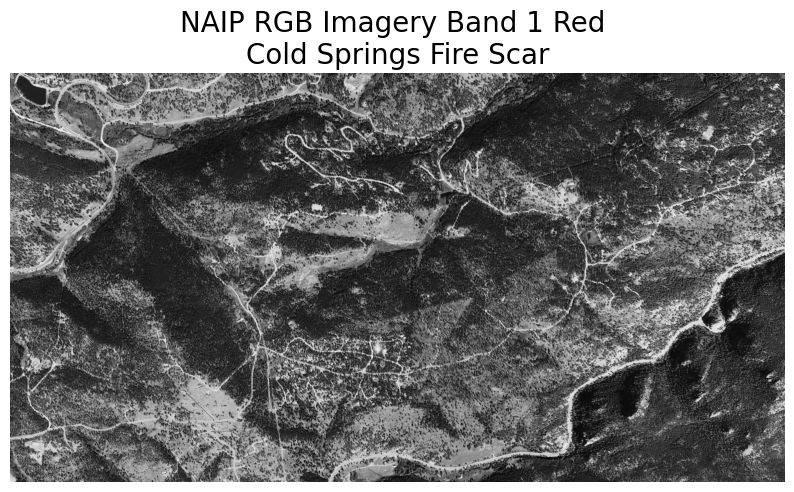

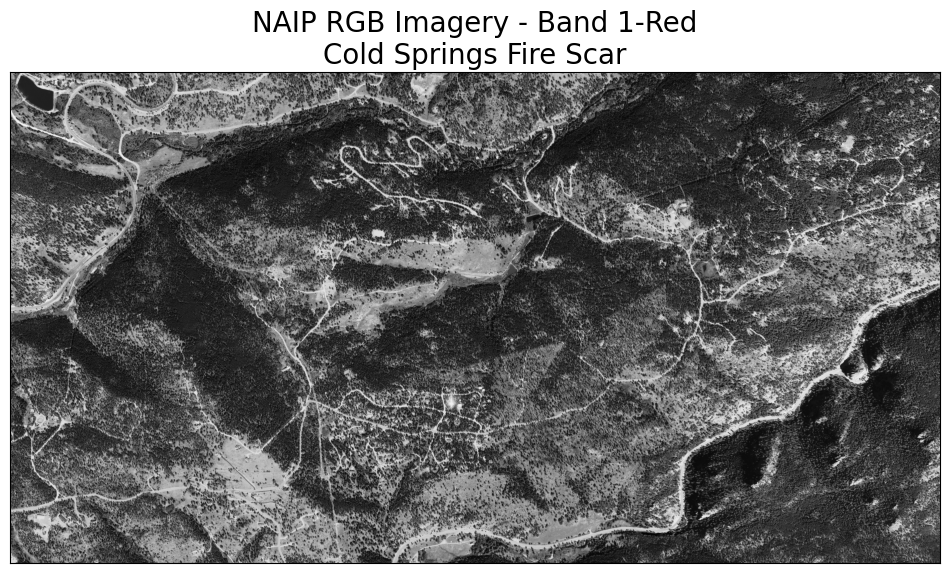

<xarray.DataArray ()> Size: 4B
array(17., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
<xarray.DataArray ()> Size: 4B
array(242., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0


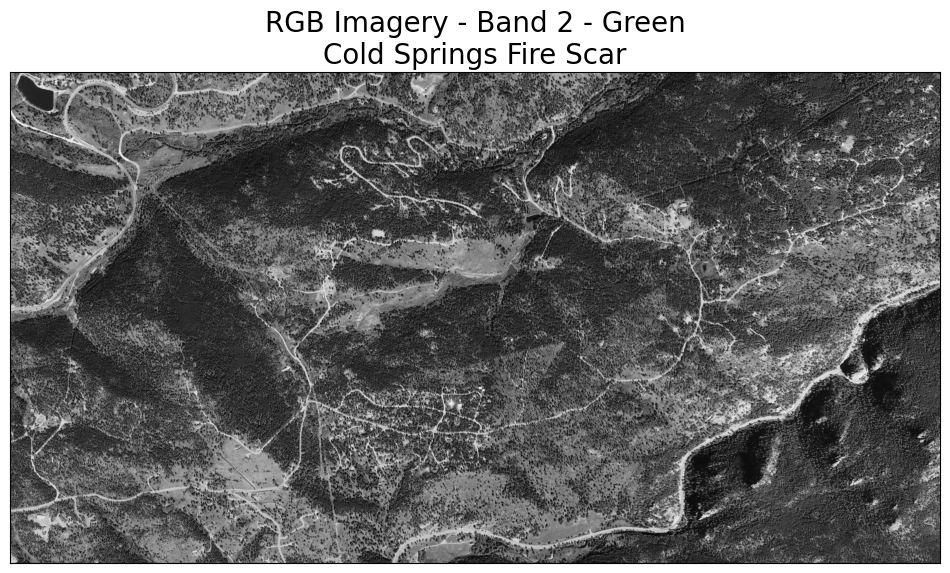

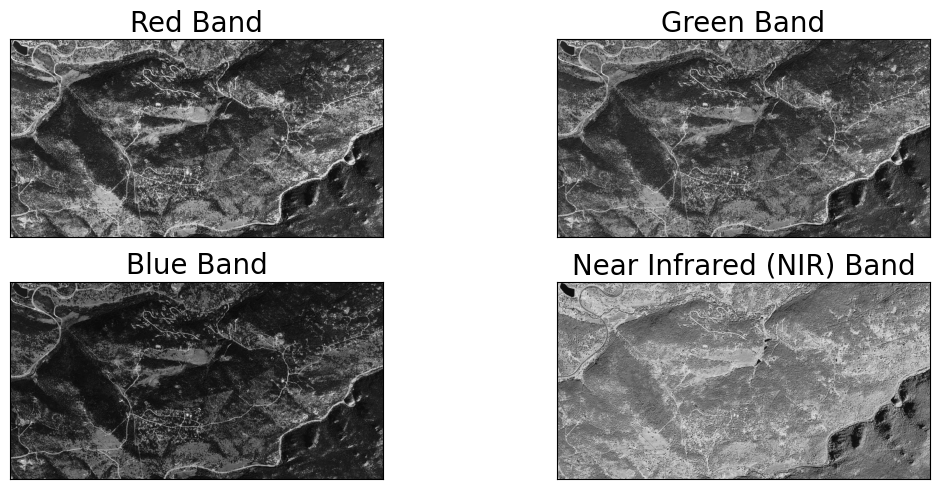

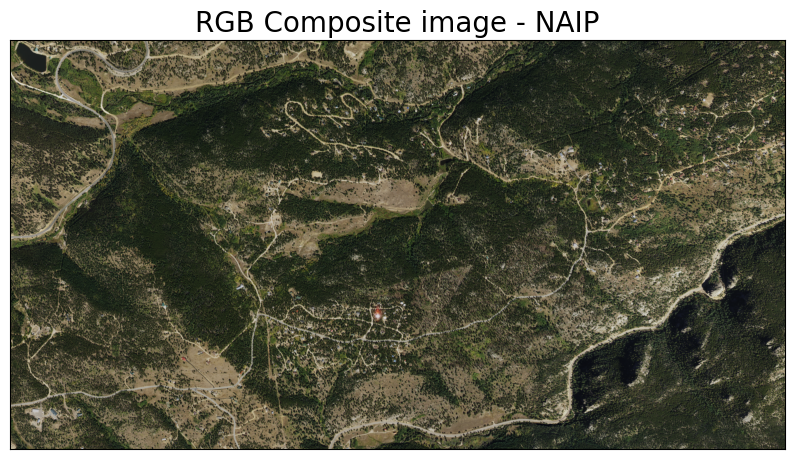

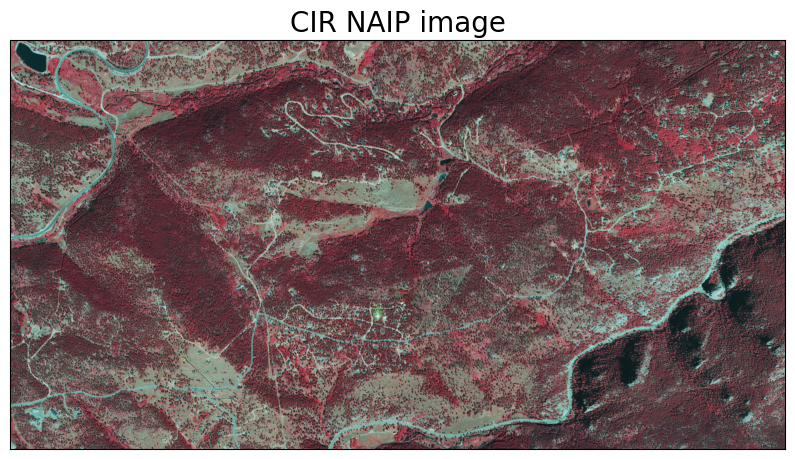

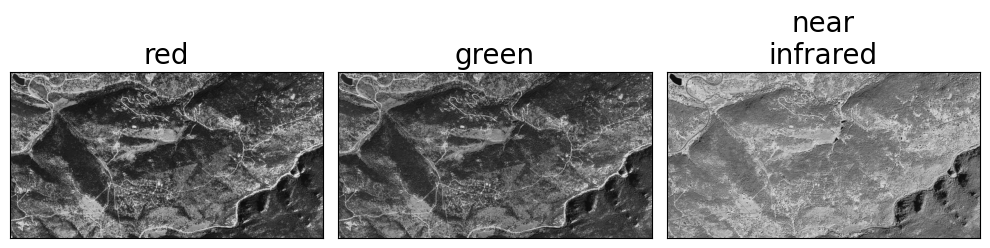

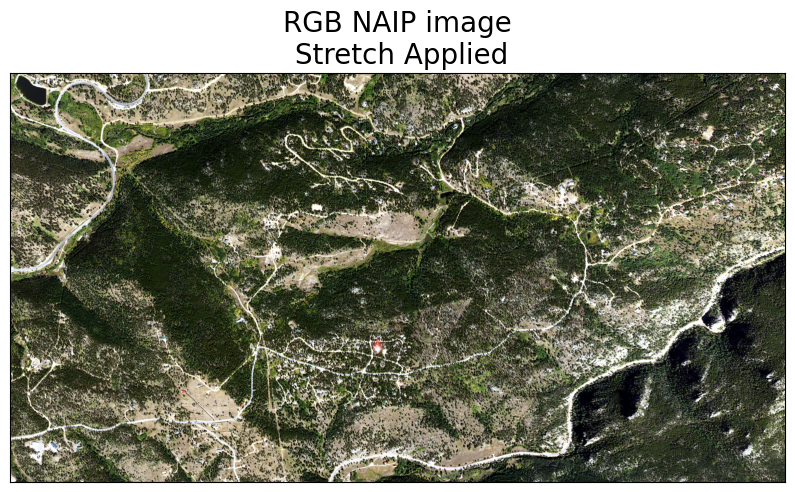

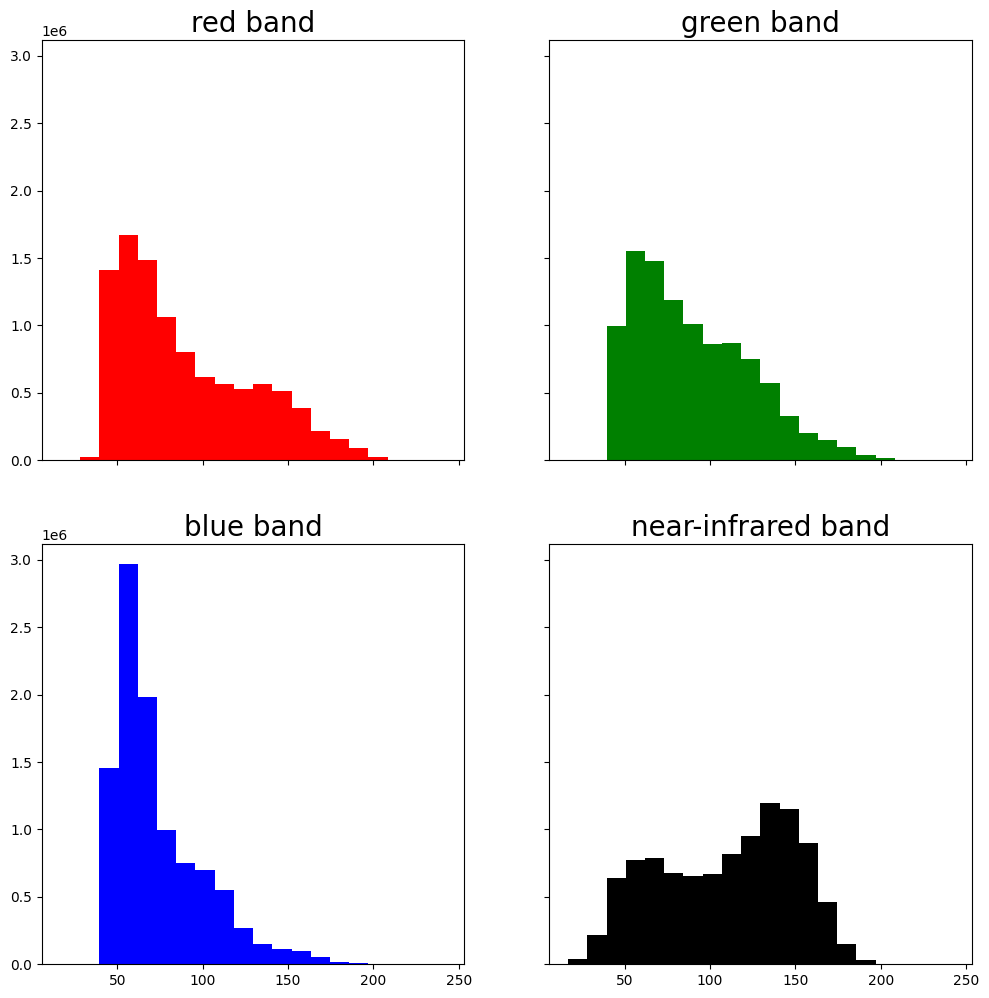

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

# Get the data
data = et.data.get_data('cold-springs-fire')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

naip_csf_path = os.path.join("cold-springs-fire", 
                             "naip", 
                             "m_3910505_nw_13_1_20150919", 
                             "crop", 
                             "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)
naip_csf

naip_csf.shape

fig, ax = plt.subplots()

ax.imshow(naip_csf[0], 
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

ep.plot_bands(naip_csf[0],
              title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

naip_csf.band

# View min and max value
print(naip_csf.min())
print(naip_csf.max())

# Plot band 2 - green
ep.plot_bands(naip_csf[1],
              title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(naip_csf, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

ep.plot_rgb(naip_csf.values,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

ep.plot_rgb(naip_csf.values, title="CIR NAIP image",
            rgb=[3, 0, 1],
            figsize=(10, 8))
plt.show()

titles = ['red', 'green', 'near\ninfrared']
ep.plot_bands(naip_csf[[0, 1, 3]],
              figsize=(10,  7),
              title=titles,
              cbar=False)
plt.show()

band_indices = [0, 1, 2]

# Apply stretch using the earthpy plot_rgb function
ep.plot_rgb(naip_csf.values,
            rgb=band_indices,
            title="RGB NAIP image\n Stretch Applied",
            figsize=(10, 8),
            stretch=True)
plt.show()


# Create a colors and titles list to use in the histogram, then plot
colors = ['r', 'g', 'b', 'k']
titles = ['red band', 'green band', 'blue band', 'near-infrared band']

ep.hist(naip_csf.values, 
        colors=colors, 
        title=titles, 
        cols=2)

plt.show()

